# Dec 18th, 2021 (rabies)

**Motivation**: Organize files shared by Gabe.  Includes clean time series, brain masks per run, and temporal masks. <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')
%matplotlib inline

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice((192, 4))
mice.setup_anat_data()

meta_dir = pjoin(mice.cfg.base_dir, 'meta_info')
cwd = pjoin(mice.cfg.download_dir, 'native_mot6_FD_DVARS_WM_CSF')
os.listdir(cwd)

['native_brain_mask', 'confound_correction_wf_datasink']

In [3]:
csv_files = []
for p in pathlib.Path(cwd).rglob('*.csv'):
    csv_files.append(str(p))

dlist = []
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        for run in mice.cfg.run_ids:
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in csv_files if
                    all(k in e for k in patterns)
                )
                vals = pd.read_csv(f).values.ravel()
                dlist.append({
                    'sub': [sub] * len(vals),
                    'ses': [ses] * len(vals),
                    'run': [run] * len(vals),
                    'key': [key] * len(vals),
                    'temporal_mask': vals.astype(int),
                })
            except StopIteration:
                print(f"Warning, missing:\t{key}")

df = pd.DataFrame(merge_dicts(dlist))

_ = save_obj(
    obj=df,
    file_name='temporal_mask',
    save_dir=meta_dir,
    mode='df',
)

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC08_ses-1_run-7

[PROGRESS] 'temporal_mask.df' saved at
/home/hadi/Documents/Ca-fMRI/meta_info

In [4]:
df

,sub,ses,run,key,temporal_mask
0,1,1,1,sub-SLC01_ses-1_run-1,0
1,1,1,1,sub-SLC01_ses-1_run-1,1
2,1,1,1,sub-SLC01_ses-1_run-1,1
3,1,1,1,sub-SLC01_ses-1_run-1,1
4,1,1,1,sub-SLC01_ses-1_run-1,1
...,...,...,...,...,...
121795,10,3,7,sub-SLC10_ses-3_run-7,1
121796,10,3,7,sub-SLC10_ses-3_run-7,1
121797,10,3,7,sub-SLC10_ses-3_run-7,1
121798,10,3,7,sub-SLC10_ses-3_run-7,1


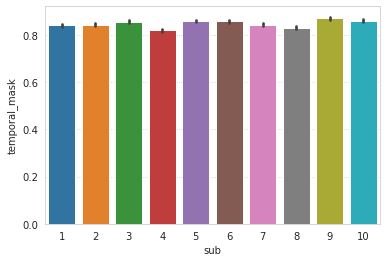

In [5]:
sns.barplot(data=df, x='sub', y='temporal_mask')
plt.show()

In [6]:
df = df.groupby(['key']).mean()
df

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-1_run-1,1.0,1.0,1.0,0.936667
sub-SLC01_ses-1_run-2,1.0,1.0,2.0,0.643333
sub-SLC01_ses-1_run-3,1.0,1.0,3.0,0.858333
sub-SLC01_ses-1_run-4,1.0,1.0,4.0,0.503333
sub-SLC01_ses-1_run-5,1.0,1.0,5.0,0.790000
...,...,...,...,...
sub-SLC10_ses-3_run-3,10.0,3.0,3.0,0.941667
sub-SLC10_ses-3_run-4,10.0,3.0,4.0,0.861667
sub-SLC10_ses-3_run-5,10.0,3.0,5.0,0.876667


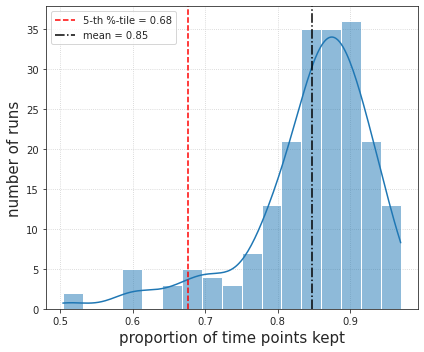

In [7]:
fig, ax = create_figure(1, 1, (6, 5))

sns.histplot(df, x='temporal_mask', kde=True, ax=ax)
q = df['temporal_mask'].quantile(q=0.05)
ax.axvline(q, color='r', ls='--', label=f'5-th %-tile = {q:0.2f}')
q = df['temporal_mask'].mean()
ax.axvline(q, color='k', ls='-.', label=f'mean = {q:0.2f}')
ax.set_xlabel('proportion of time points kept', fontsize=15)
ax.set_ylabel('number of runs', fontsize=15)
ax.grid()
ax.legend()

plt.show()

In [8]:
q = df['temporal_mask'].quantile(q=0.05)
q

0.6768333333333333

In [9]:
df.loc[df['temporal_mask'] <= q]

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-1_run-2,1.0,1.0,2.0,0.643333
sub-SLC01_ses-1_run-4,1.0,1.0,4.0,0.503333
sub-SLC02_ses-2_run-5,2.0,2.0,5.0,0.608333
sub-SLC02_ses-3_run-5,2.0,3.0,5.0,0.590000
sub-SLC03_ses-1_run-3,3.0,1.0,3.0,0.603333
sub-SLC04_ses-1_run-4,4.0,1.0,4.0,0.661667
sub-SLC05_ses-2_run-2,5.0,2.0,2.0,0.643333
sub-SLC07_ses-1_run-5,7.0,1.0,5.0,0.676667
sub-SLC07_ses-1_run-7,7.0,1.0,7.0,0.590000


In [10]:
df.loc[df['temporal_mask'] > 0.95]

,sub,ses,run,temporal_mask
key,,,,
sub-SLC01_ses-2_run-7,1.0,2.0,7.0,0.958333
sub-SLC03_ses-3_run-1,3.0,3.0,1.0,0.970000
sub-SLC06_ses-2_run-7,6.0,2.0,7.0,0.958333
sub-SLC07_ses-3_run-5,7.0,3.0,5.0,0.966667
sub-SLC08_ses-1_run-3,8.0,1.0,3.0,0.960000
sub-SLC09_ses-1_run-7,9.0,1.0,7.0,0.963333
sub-SLC10_ses-2_run-1,10.0,2.0,1.0,0.960000


## Brain mask

In [11]:
mask_files = []
for p in pathlib.Path(cwd).rglob('*_brain_mask.nii.gz'):
    mask_files.append(str(p))
mask_files = sorted(mask_files)

In [12]:
masks = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        for run in mice.cfg.run_ids:
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in mask_files if
                    all(k in e for k in patterns)
                )
                masks[key] = ants.image_read(f)
            except StopIteration:
                print(f"Warning, missing:\t{key}")

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC08_ses-1_run-7

In [13]:
good_ctr = 0
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        key = f"sub-SLC{sub:02d}_ses-{ses:d}"
        available = {k: v for k, v in masks.items() if key in k}
        for i, j in itertools.combinations(range(len(available)), 2):
            m1 = list(available.values())[i].numpy()
            m2 = list(available.values())[j].numpy()
            if overlap_score(m1, m2) != 1.0 or dice_score(m1, m2) != 1.0:
                print(i, j, overlap_score(m1, m2), dice_score(m1, m2))
            else:
                good_ctr += 1
good_ctr

606

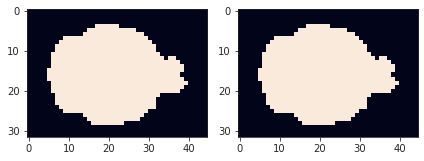

In [14]:
i = 1
j = 3
m1 = masks[f'sub-SLC04_ses-2_run-{i}'].numpy()
m2 = masks[f'sub-SLC04_ses-2_run-{j}'].numpy()
fig, axes = create_figure(1, 2)
axes[0].imshow(m1[..., 15])
axes[1].imshow(m2[..., 15])
plt.show()

In [15]:
masks_ses = {}
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        _masks = []
        for run in mice.cfg.run_ids:
            key = mice.get_key(sub, ses, run)
            m = masks.get(key)
            if m is not None:
                _masks.append(m.numpy())
                
        key = mice.get_key(sub, ses)
        if len(_masks):
            m = functools.reduce(np.logical_and, _masks)
            masks_ses[key] = m.astype(bool)
        else:
            print(f"Warning, missing:\t{key}")

In [16]:
masks_ses['sub-SLC02_ses-1'].shape

(32, 43, 26)

In [17]:
sub, ses

(10, 3)

<matplotlib.image.AxesImage object at 0x7f4c335a49d0>

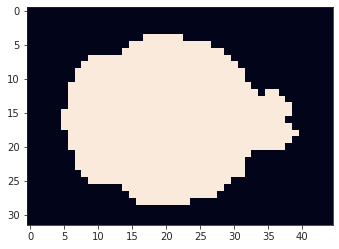

In [18]:
plt.imshow(masks_ses['sub-SLC04_ses-2'][..., 15])

In [23]:
m200 = mice.mask3d['sub-SLC04_ses-2'].load_ants()
m200

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (64, 64, 78)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [24]:
m400 = masks['sub-SLC04_ses-2_run-1']
m400

ANTsImage (LPI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (32, 45, 26)
         Spacing    : (0.4, 0.4, 0.4)
         Origin     : (19.0, 7.9, -4.65)
         Direction  : [-1.  0.  0.  0. -1.  0.  0.  0.  1.]

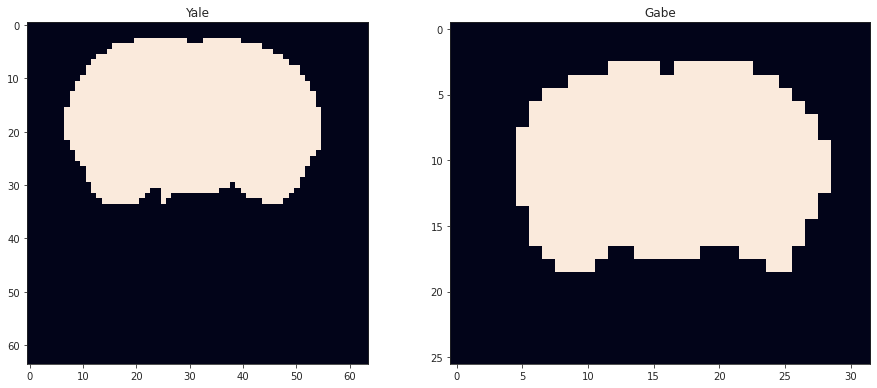

In [54]:
fig, axes = create_figure(1, 2, (13, 5.5))
axes[0].imshow(m200[..., 40].T)
axes[1].imshow(m400[:, 23, :].T[::-1])

axes[0].set_title('Yale')
axes[1].set_title('Gabe')
plt.show()

In [46]:
45 / 78 * 40

23.076923076923073

In [19]:
bold_files = []
for p in pathlib.Path(cwd).rglob('*_bold_combined_cleaned.nii.gz'):
    bold_files.append(str(p))
bold_files = sorted(bold_files)

In [23]:
for sub in mice.cfg.sub_ids:
    for ses in mice.cfg.ses_ids:
        for run in mice.cfg.run_ids:
            patterns = [
                f"sub-SLC{sub:02d}",
                f"ses-{ses:d}",
                f"run-{run:d}",
            ]
            key = '_'.join(patterns)
            try:
                f = next(
                    e for e in bold_files if
                    all(k in e for k in patterns)
                )
            except StopIteration:
                print(f"Warning, missing:\t{key}")

Warning, missing:       sub-SLC03_ses-1_run-1

Warning, missing:       sub-SLC03_ses-3_run-2

Warning, missing:       sub-SLC04_ses-3_run-2

Warning, missing:       sub-SLC05_ses-1_run-5

Warning, missing:       sub-SLC06_ses-3_run-2

Warning, missing:       sub-SLC07_ses-1_run-6

Warning, missing:       sub-SLC08_ses-1_run-7

In [24]:
img = ants.image_read(f)
img

ANTsImage
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (32, 45, 26, 503)
         Spacing    : (0.4, 0.4, 0.4, 1.0)
         Origin     : (19.3, 7.75, -4.95, 0.0)
         Direction  : [-1.  0.  0.  0.  0. -1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]

<matplotlib.image.AxesImage object at 0x7faba4f81e20>

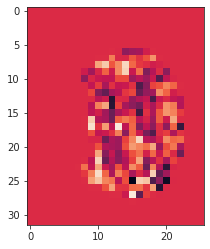

In [25]:
plt.imshow(img.numpy()[:, 26, :, 120])